# Dummy Variable (variable muete)


## Import the relevant libraries

In [1]:
import numpy as np #nous permet de travailler avec des tableaux multidimensionnels
import pandas as pd 
import scipy #ecosystem python contenant de nombreux outils de calculs scientifiques 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn 

## Load the data

In [50]:
#because i used pandas, data will automatically convert to dataFrame
raw_data = pd.read_csv("1.03.Dummies.csv")

In [51]:
raw_data

SAT   GPA Attendance
0   1714  2.40         No
1   1664  2.52         No
2   1760  2.54         No
3   1685  2.74         No
4   1693  2.83         No
..   ...   ...        ...
79  1936  3.71        Yes
80  1810  3.71        Yes
81  1987  3.73         No
82  1962  3.76        Yes
83  2050  3.81        Yes

[84 rows x 3 columns]

On transfome les YES en 1 et les No en 0 car la regression lineare ne traite que les valeurs numériques 

In [52]:
data = raw_data.copy()

In [53]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [54]:
data

SAT   GPA  Attendance
0   1714  2.40           0
1   1664  2.52           0
2   1760  2.54           0
3   1685  2.74           0
4   1693  2.83           0
..   ...   ...         ...
79  1936  3.71           1
80  1810  3.71           1
81  1987  3.73           0
82  1962  3.76           1
83  2050  3.81           1

[84 rows x 3 columns]

In [55]:
data.describe()
#SAT = critical reading + mathematics + writing 
#GPA = grade point average(at graduation from university)

SAT        GPA  Attendance
count    84.000000  84.000000   84.000000
mean   1845.273810   3.330238    0.464286
std     104.530661   0.271617    0.501718
min    1634.000000   2.400000    0.000000
25%    1772.000000   3.190000    0.000000
50%    1846.000000   3.380000    0.000000
75%    1934.000000   3.502500    1.000000
max    2050.000000   3.810000    1.000000

NOTE: Nous avons 0,464286 soit 46% en moyenne des étudiants qui ont assistés au cours à 75% ou plus
==> il plus de 0 que de 1 dans la colonne,  soit plus d'étudiants avec un taux d'assistance inférieur à 75%

## Create the first multiple regression who Explain GPA based on the SAT and the Attendance 

we are goind to create a linear regression which predicts GPA based on the SAT score obtained

Define the dependent and the independent variables

In [56]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

# GPA = b0 + SAT.x1 + + b2.Attendance + £ our regression 

## Regression itself

In [57]:
# Ici nous essayons de trouver les coefficients b0 et b1 de manière à minimiser l'erreur £->0
#OLS = Ordinary Least Squared error 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit() # fit() est une méthode d'estimation Spécifique pour obtenir l'adéquation du modèle 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           2.19e-15
Time:                        00:42:42   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=>pour qu'un coefficient soit significatif, il faut que P>|t| soit inférieur à 0,5 ou encore P-value < 0,5

=> une bonne ajustement de R-squared: garantie un bon modèle en d'autre termes, plus 'Adj. R-squared:' est grand plus    le modèle est fiable

=>dans l'exemple ci-dessous, l'introduction de la colonne 'Attendance' a conduit à une Augmentation de 'Adj. R-squared:' et on peut constater que la p-value de son coefficient est < 0,05 soit 0,00 ( CE QUI EST PARFAIT) et nous avons également 'Adj. R-squared:' est de 0,555, ce qui n'est pas mal par rapport à 0,399 obtenu dans l'autre noteB

=> conclusion: GPA = b0 + b1.SAT + + b2.Attendance = 0.6439 + 0.0014.SAT + 0.2226.Attendance est un bon modèle 

# GPA =  0.6439 + 0.0014.SAT + 0.2226.Attendance
==> GPA =  0.8665 + 0.0014.SAT        pour Attendance=1

==> GPA =  0.6439 + 0.0014.SAT        pour Attendance=0

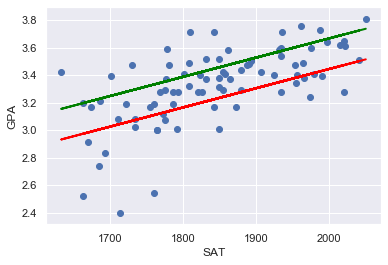

In [58]:
plt.scatter(data['SAT'], y)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes =  0.8665 + 0.0014*data['SAT']

fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='green')
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

Les ponts rouge de la figure ci-dessous représentent les étudiants ayant Assister au cours avec un taux Supérieur ou égal à 75% et les pints, les étudiants avec un taux d'assitance inférieur à 75%

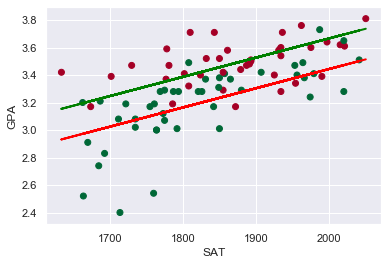

In [59]:
plt.scatter(data['SAT'], y, c=data['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes =  0.8665 + 0.0014*data['SAT']

fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='green')
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

La regression d'origne (celle que nous avions à la base)

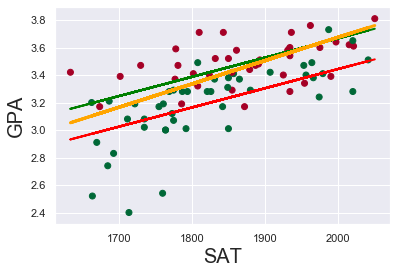

In [60]:
plt.scatter(data['SAT'], data['GPA'], c=data['Attendance'], cmap='RdYlGn_r')

yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes =  0.8665 + 0.0014*data['SAT']
yhat =  0.275 + 0.0017*data['SAT']

fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='green', )
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='red', label ='regression line2')
fig = plt.plot(data['SAT'], yhat, lw=3, c='orange', label ='regression line')

plt.xlabel('SAT', fontsize= 20)
plt.ylabel('GPA', fontsize= 20)
plt.show()

## How to make predictions based on the regressions we create 

In [61]:
x

const   SAT  Attendance
0     1.0  1714           0
1     1.0  1664           0
2     1.0  1760           0
3     1.0  1685           0
4     1.0  1693           0
..    ...   ...         ...
79    1.0  1936           1
80    1.0  1810           1
81    1.0  1987           0
82    1.0  1962           1
83    1.0  2050           1

[84 rows x 3 columns]

La colonne constante a été ajoutée pas la fonction sm.add_constant(x1) Appliquer à x1 précédemment 

In [62]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700, 1670], 'Attendance':[0,1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

const   SAT  Attendance
0      1  1700           0
1      1  1670           1

In [63]:
new_data.rename(index={0:'Bob', 1:'Alice'})

const   SAT  Attendance
Bob        1  1700           0
Alice      1  1670           1

In [64]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [73]:
predictionsdf = pd.DataFrame({'predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob', 1:'Alice'})

const   SAT  Attendance  predictions
Bob        1  1700           0     3.023513
Alice      1  1670           1     3.204163